# Overview of the Adult Immune cell atlas

In here I will highlight look if there is a relationship between number of cells in a cluster or genes in the DE list and the alpha inferred by ABC-MK

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [2]:
sc.set_figure_params(dpi=150, dpi_save=300, transparent=False) # Makes it more visible

In [3]:
#tmpfile = '../h5ad_files/Bcells_lineage_wilcox_tmp.h5ad'

In [4]:
#alpha_dir = "/mnt/storage/Github/Immune_Adaptation_Atlas/From_Jesus/results_1707/adult_tissues/orthologs/"
#alpha_vals = pd.read_csv(alpha_dir + "abcmk_inference_top_500_orthologs.txt", sep="\t")

In [5]:
#alpha_dir = "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/results/adult_tissues/"
alpha_dir = "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/results_2024/"
alpha_vals = pd.read_csv(alpha_dir + "adult_abcmk_alpha_pvalues.txt", sep="\t")

In [6]:
alpha_vals

cell     line  type    α_weak  α_strong  \
0                            ABCs   Bcells  case  0.065437  0.096671   
1            Alveolar_macrophages  Myeloid  case  0.023407  0.063247   
2             Classical_monocytes  Myeloid  case  0.138008  0.146896   
3                             DC1  Myeloid  case  0.023154  0.333715   
4                             DC2  Myeloid  case  0.025469  0.192664   
5   Erythrophagocytic_macrophages  Myeloid  case  0.040510  0.083955   
6                          GC_B_I   Bcells  case  0.033860  0.191615   
7                         GC_B_II   Bcells  case  0.068146  0.176043   
8                            ILC3   Tcells  case  0.085016  0.083514   
9        Intermediate_macrophages  Myeloid  case  0.038294  0.082712   
10         Intestinal_macrophages  Myeloid  case  0.082302  0.136544   
11                           MAIT   Tcells  case  0.075060  0.099611   
12                 Memory_B_cells   Bcells  case  0.049334  0.146295   
13                       NK_CD16+   Tcells  case  0.054411  0.056018   
14            NK_CD56bright_CD16-   Tcells  case  0.155545  0.119298   
15                  Naive_B_cells   Bcells  case  0.045575  0.058393   
16         Nonclassical_monocytes  Myeloid  case  0.122937  0.115839   
17                   Plasma_cells   Bcells  case  0.067044  0.097392   
18                   Plasmablasts   Bcells  case  0.034293  0.079108   
19                          Pre-B   Bcells  case  0.054418  0.211829   
20               Teffector_EM_CD4   Tcells  case  0.049227  0.074504   
21                   Tem_emra_CD8   Tcells  case  0.047396  0.077955   
22                            Tfh   Tcells  case  0.054902  0.082968   
23                     Tgd_CRTAM+   Tcells  case  0.062774  0.071176   
24                  Tnaive_CM_CD4   Tcells  case  0.019658  0.031458   
25        Tnaive_CM_CD4_activated   Tcells  case  0.071645  0.113909   
26                  Tnaive_CM_CD8   Tcells  case  0.012977  0.010422   
27                          Tregs   Tcells  case  0.081047  0.098440   
28                        Trm_Tgd   Tcells  case  0.072969  0.121011   
29                   Trm_Th1_Th17   Tcells  case  0.131332  0.159650   
30                     Trm_em_CD8   Tcells  case  0.083880  0.217597   
31                    Trm_gut_CD8   Tcells  case  0.075135  0.118361   
32                          migDC  Myeloid  case  0.059729  0.204448   

           α   ωₐ_weak  ωₐ_strong        ωₐ       ωₙₐ           γ₋         β  \
0   0.212655  0.010399   0.022705  0.065950  0.221936   912.896882  0.181320   
1   0.103316  0.005166   0.015661  0.036348  0.271198  1310.643777  0.171883   
2   0.333371  0.027038   0.036975  0.095473  0.150930  1685.728397  0.232705   
3   0.394702  0.016717   0.091425  0.107371  0.172097  1043.210969  0.240741   
4   0.299548  0.009023   0.058660  0.080471  0.192932   990.985765  0.225059   
5   0.161877  0.009310   0.018874  0.040254  0.202008  1100.711771  0.222015   
6   0.278194  0.010820   0.040402  0.059089  0.164297   986.427592  0.247099   
7   0.306357  0.010189   0.044730  0.073256  0.181415   743.498803  0.243571   
8   0.206885  0.017160   0.021467  0.057483  0.244419   491.969574  0.176687   
9   0.183697  0.008401   0.017095  0.049650  0.239593   890.355287  0.197752   
10  0.254091  0.014459   0.031737  0.066831  0.206003  1156.137534  0.213212   
11  0.236445  0.023867   0.040945  0.095642  0.319292  1730.041651  0.156573   
12  0.316792  0.019354   0.054921  0.092592  0.271693   399.271385  0.186918   
13  0.120805  0.009439   0.013665  0.033133  0.269064  1502.982540  0.166863   
14  0.331146  0.038220   0.031654  0.097161  0.182034  1795.494818  0.213609   
15  0.137009  0.005159   0.010869  0.026348  0.186284  1677.305749  0.216392   
16  0.288939  0.020670   0.036828  0.071683  0.196822  1056.546901  0.208383   
17  0.187867  0.010670   0.017774  0.051163  0.223046   856.245340  0.196818   
18  0.186060  0.008076   0.021655  0.048964  0.241221   915.

In [7]:
tmpfile = '/mnt/storage/Github/Immune_Adaptation_Atlas/adult_tissues/h5ad_files/global.h5ad'

In [8]:
adata = sc.read_h5ad(tmpfile)

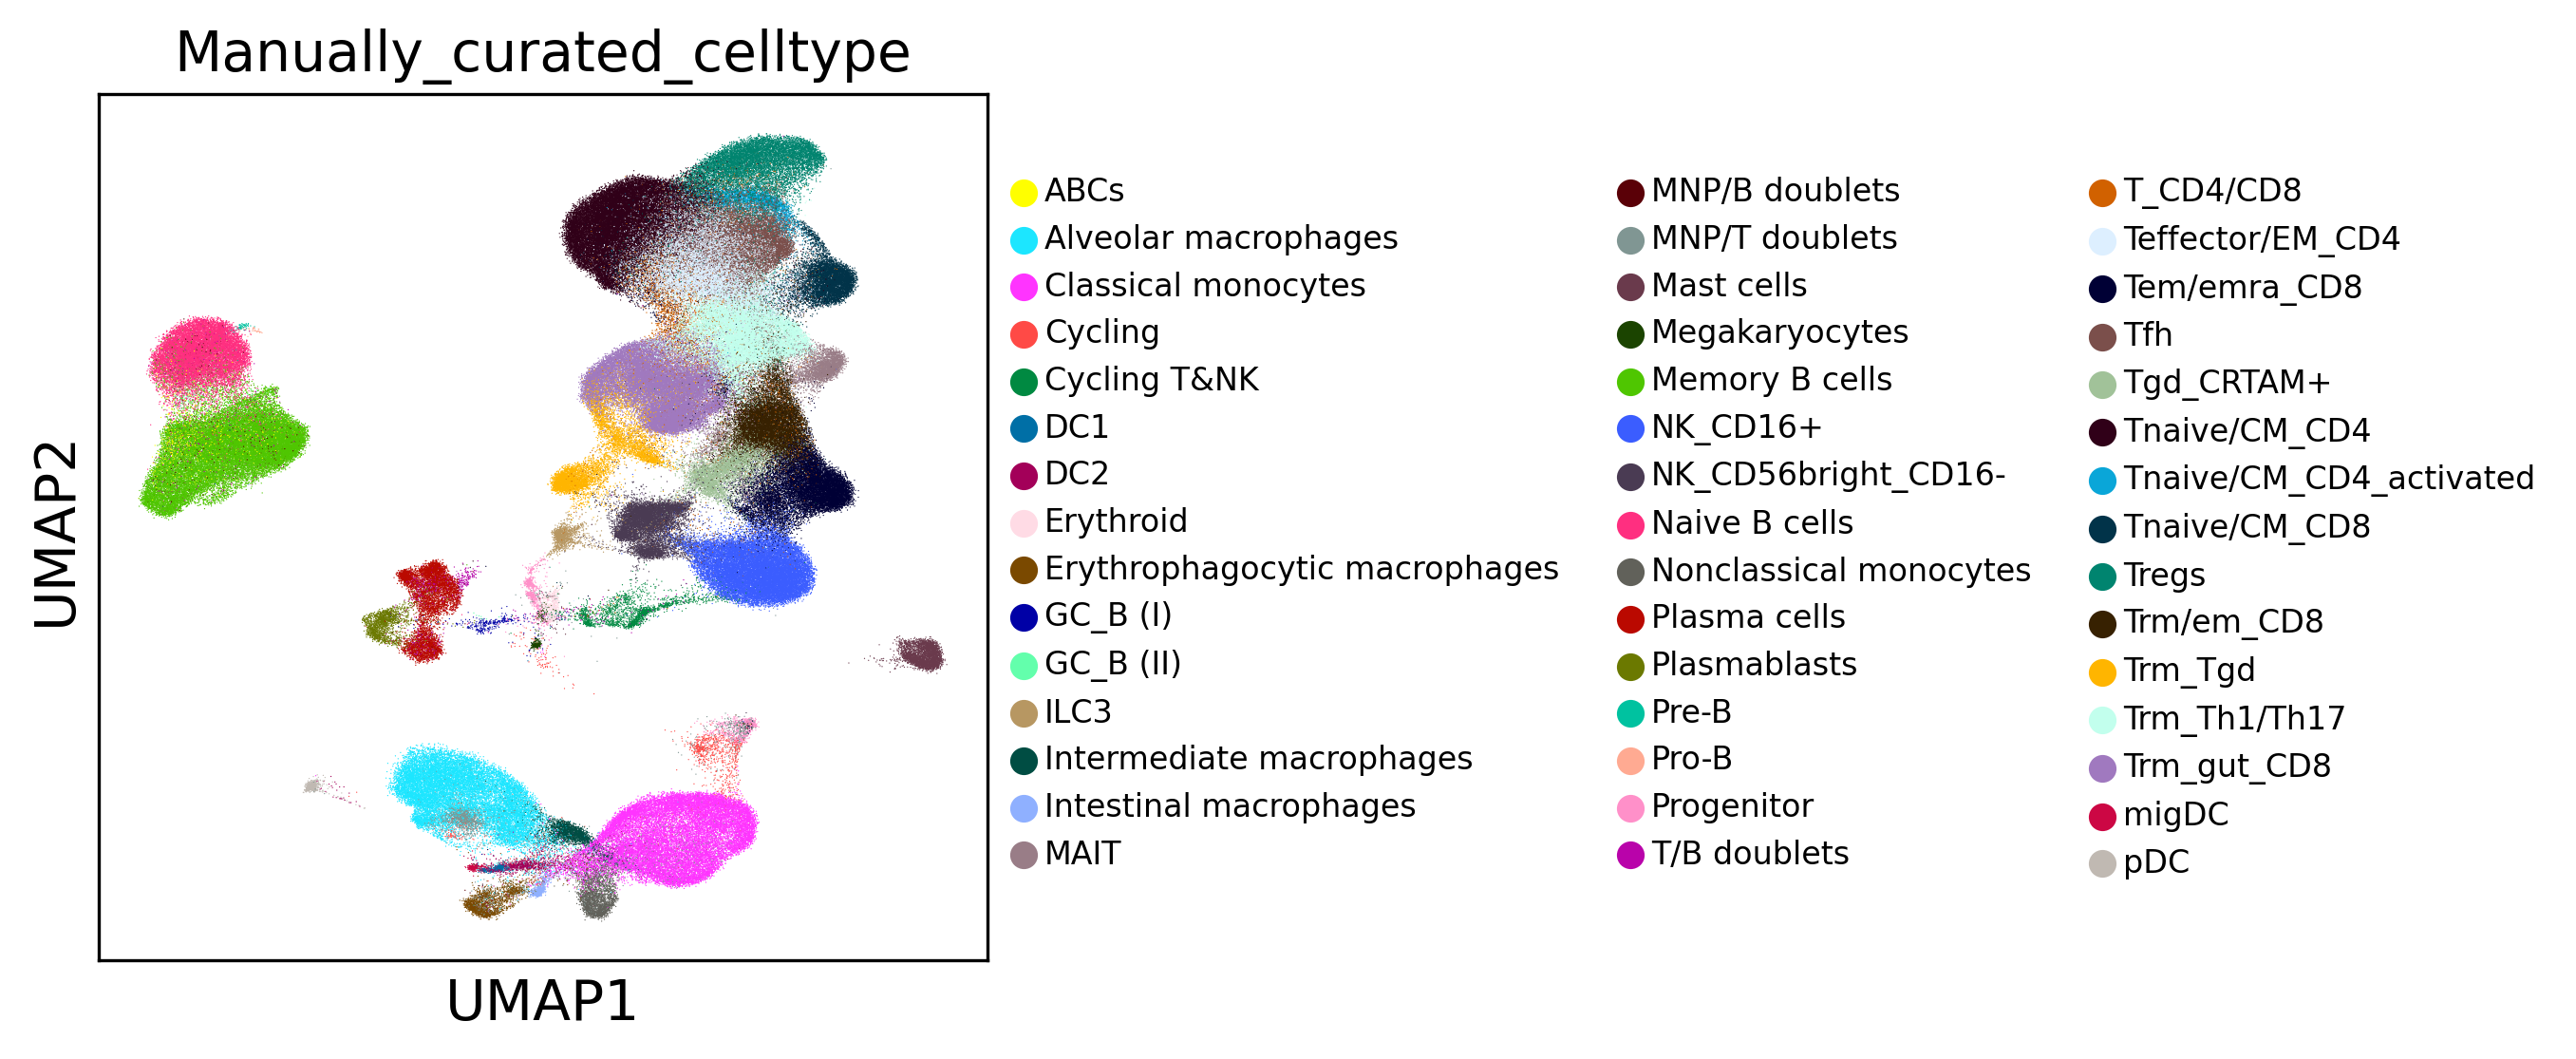

In [9]:
sc.pl.umap(adata, color="Manually_curated_celltype",#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

In [10]:
adata.obs["celltype"] = adata.obs["Manually_curated_celltype"].str.replace(r"[/ &]","_").astype('category')
adata.obs["celltype"] = adata.obs["celltype"].str.replace(r"[()]","").astype('category')

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


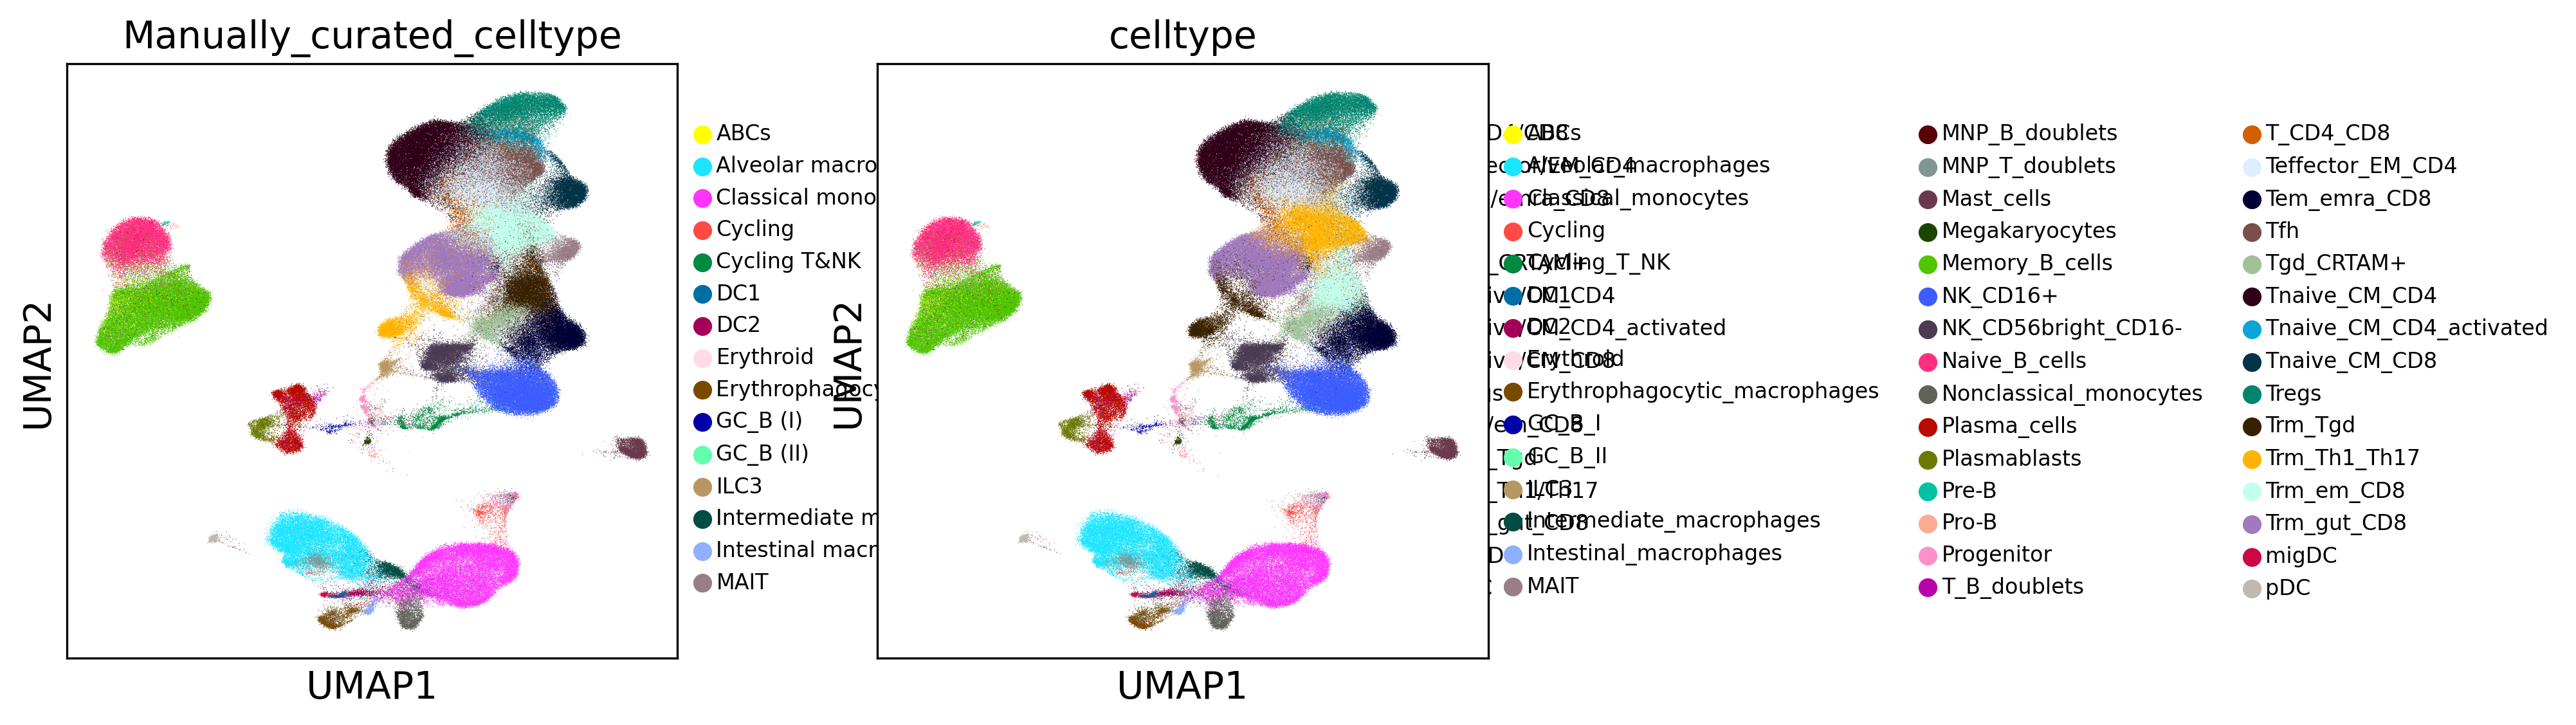

In [11]:
sc.pl.umap(adata, color=["Manually_curated_celltype","celltype"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

In [12]:
adata_subset = adata[adata.obs['Manually_curated_celltype'].isin([
    ## Bcells
    'ABCs', 'GC_B (I)', 'GC_B (II)', 
    'Memory B cells', 'Naive B cells',
    'Plasma cells', 'Plasmablasts',
    'Pre-B',# 'Pro-B',
    ## Tcells
    'ILC3', 'MAIT', 'NK_CD16+', 'NK_CD56bright_CD16-', #'T_CD4/CD8',
    'Teffector/EM_CD4', 'Tem/emra_CD8',
     'Tfh', 'Tgd_CRTAM+','Tnaive/CM_CD4', 
     'Tnaive/CM_CD4_activated', 'Tnaive/CM_CD8', 
     'Tregs','Trm/em_CD8', 'Trm_Tgd', 'Trm_Th1/Th17',
     'Trm_gut_CD8',
    ## Myeloid
    'Alveolar macrophages', 
    'Classical monocytes',# 'Cycling',
    'DC1', 'DC2',
    'Erythrophagocytic macrophages',
    'Intermediate macrophages',
    'Intestinal macrophages',# 'MNP/T doublets',
    'Nonclassical monocytes',
    'migDC'
])]

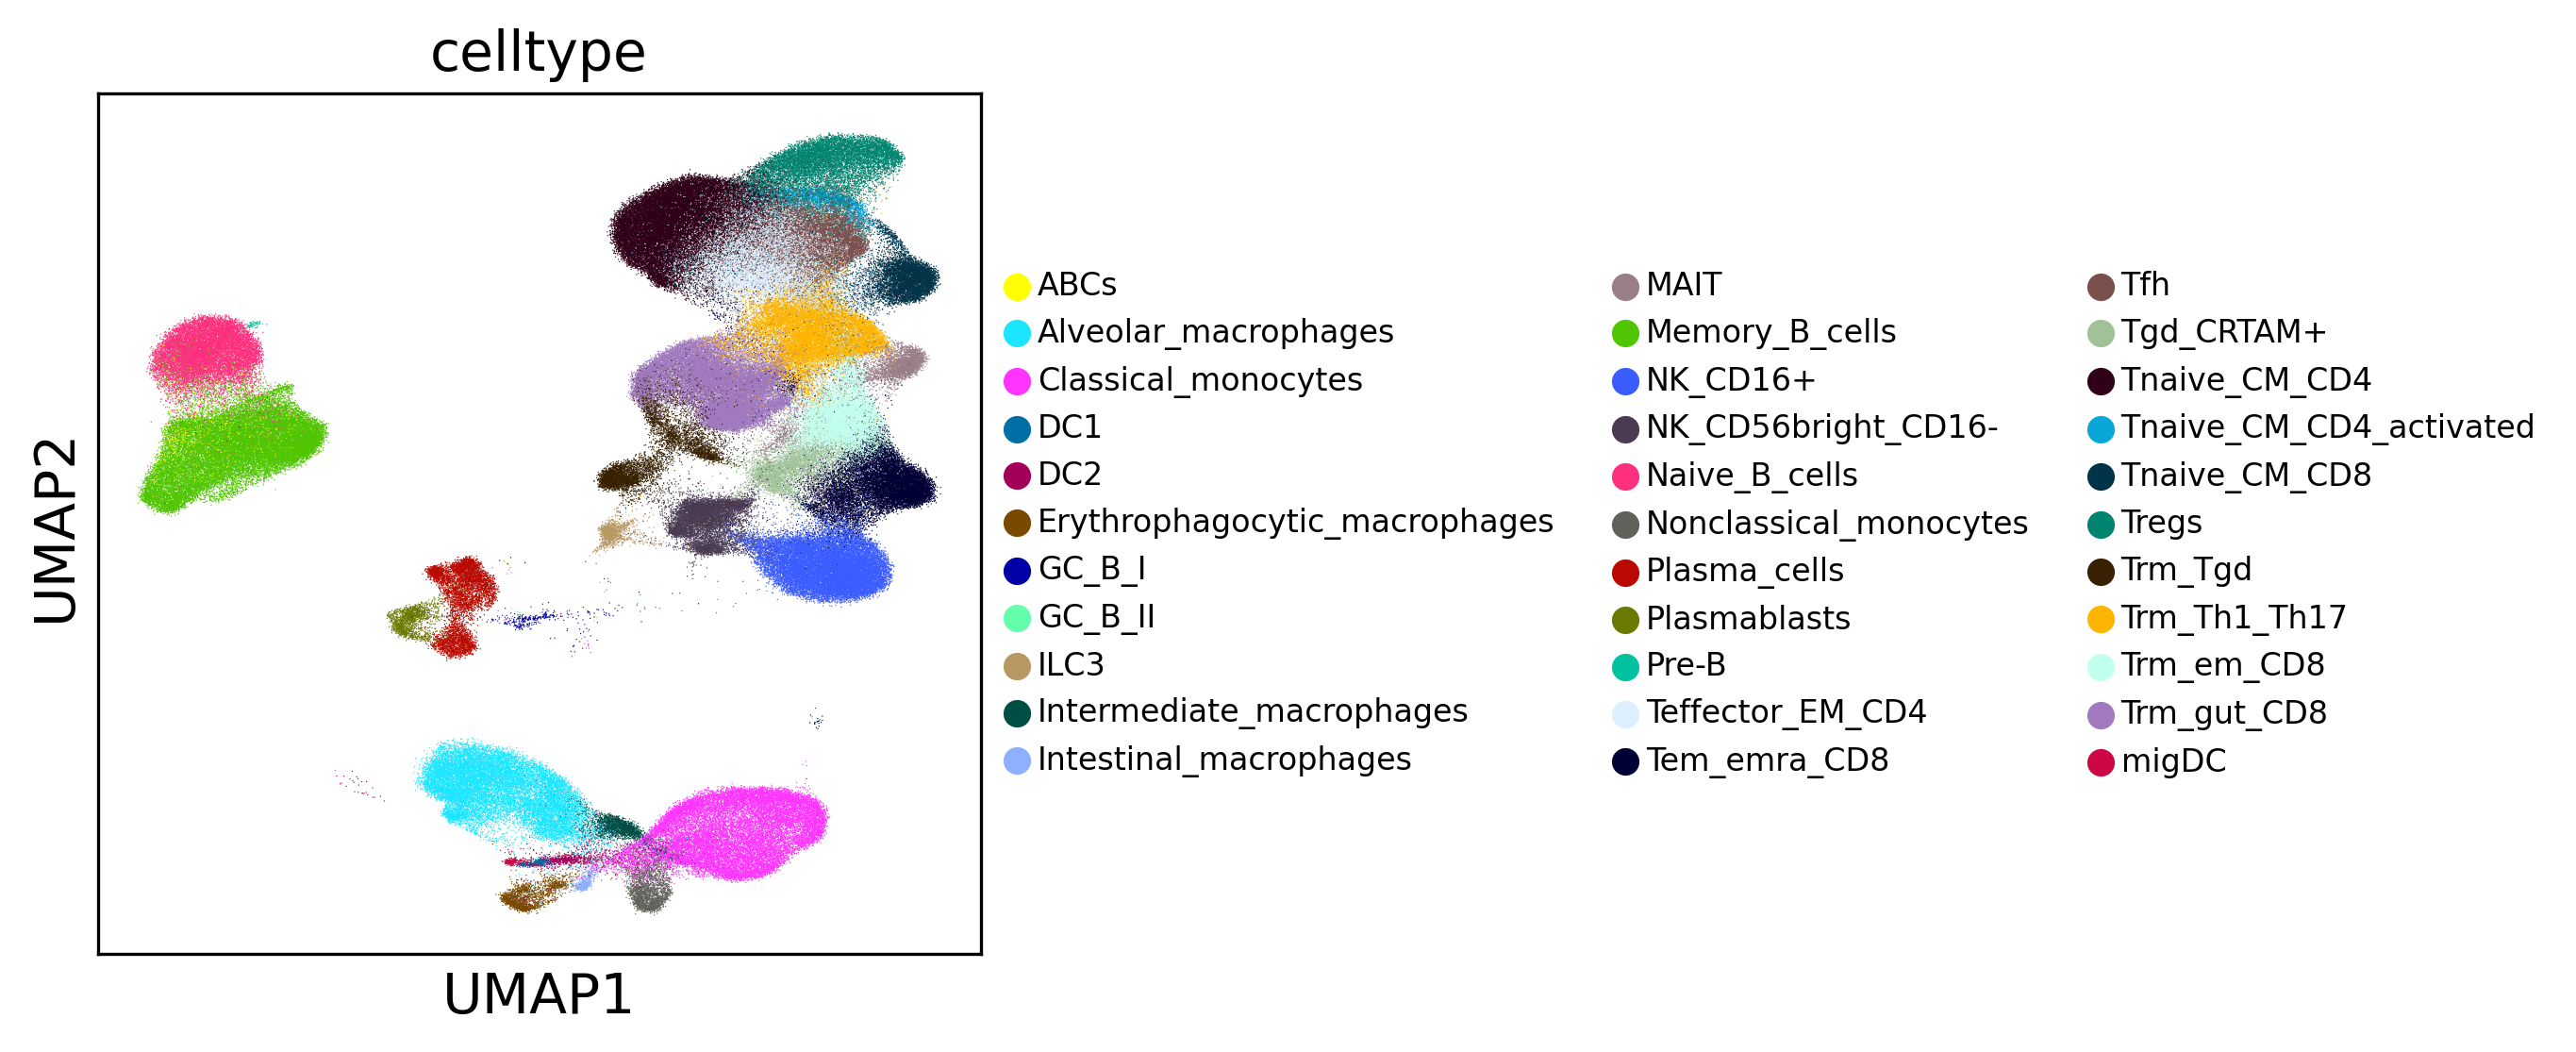

In [13]:
sc.pl.umap(adata_subset, color=["celltype"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

In [14]:
adata = adata_subset
del(adata_subset)

In [15]:
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

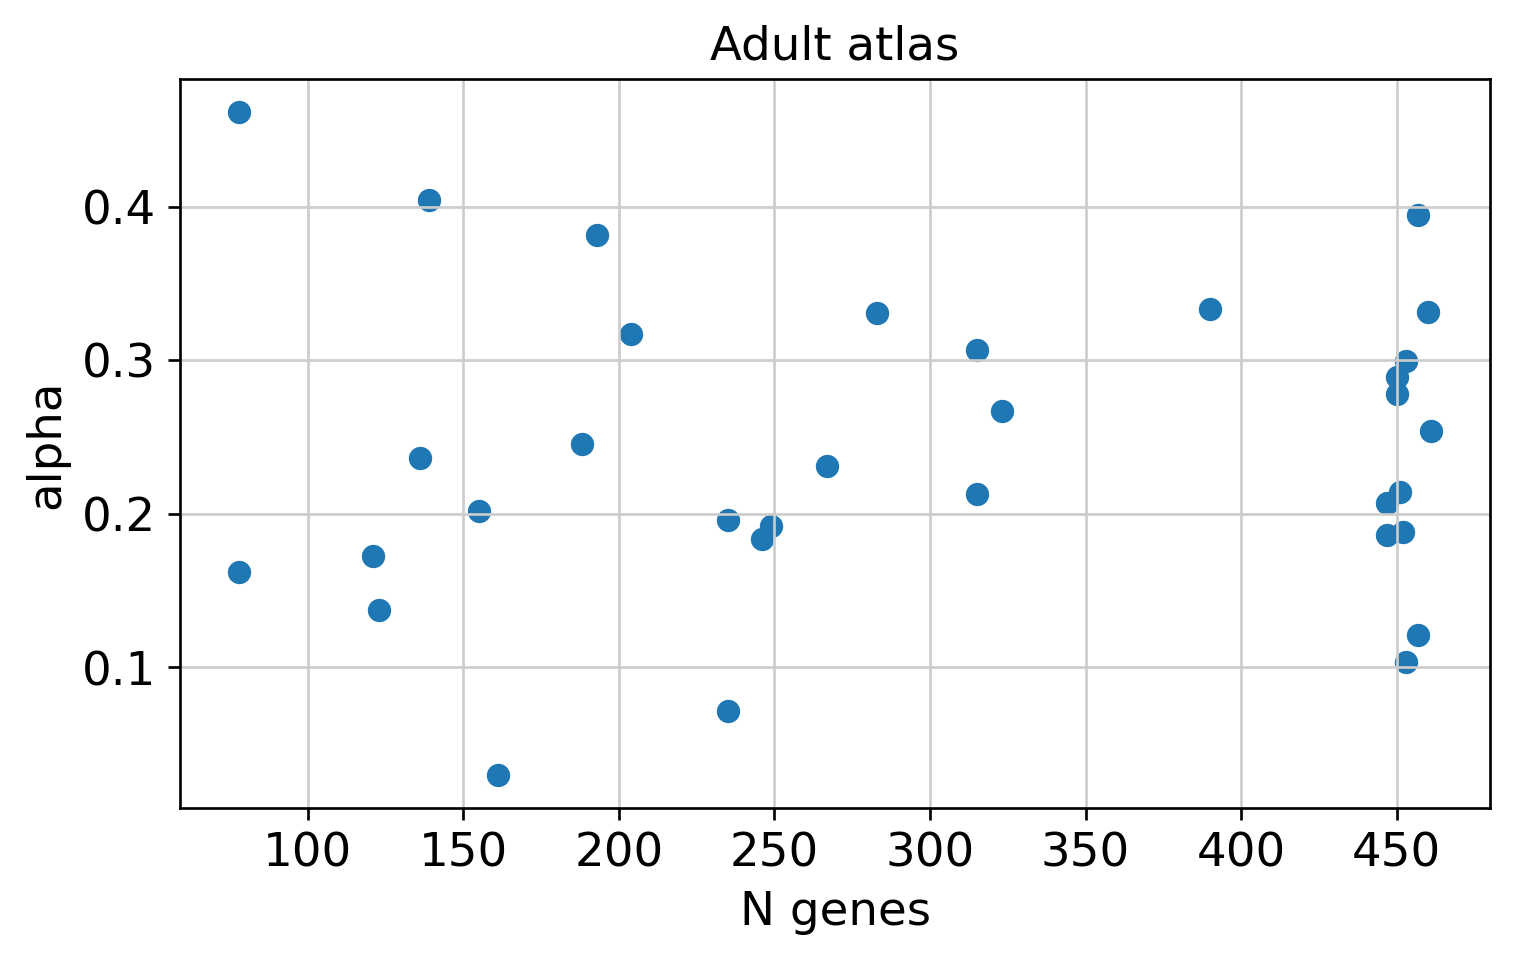

In [16]:
figure(figsize=(7, 4), dpi=120)
plt.scatter(alpha_vals["n"], alpha_vals["α"] )
plt.title("Adult atlas")
plt.xlabel("N genes")
plt.ylabel("alpha")
plt.show()

In [17]:
import statsmodels.api as sm
from scipy import stats

In [18]:
x = alpha_vals["n"].values
y = alpha_vals["α"].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [19]:
x2 = sm.add_constant(x)
mod1 = sm.OLS(y, x2).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.02054
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.887
Time:                        14:51:08   Log-Likelihood:                 30.319
No. Observations:                  33   AIC:                            -56.64
Df Residuals:                      31   BIC:                            -53.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2351      0.042      5.549      0.0

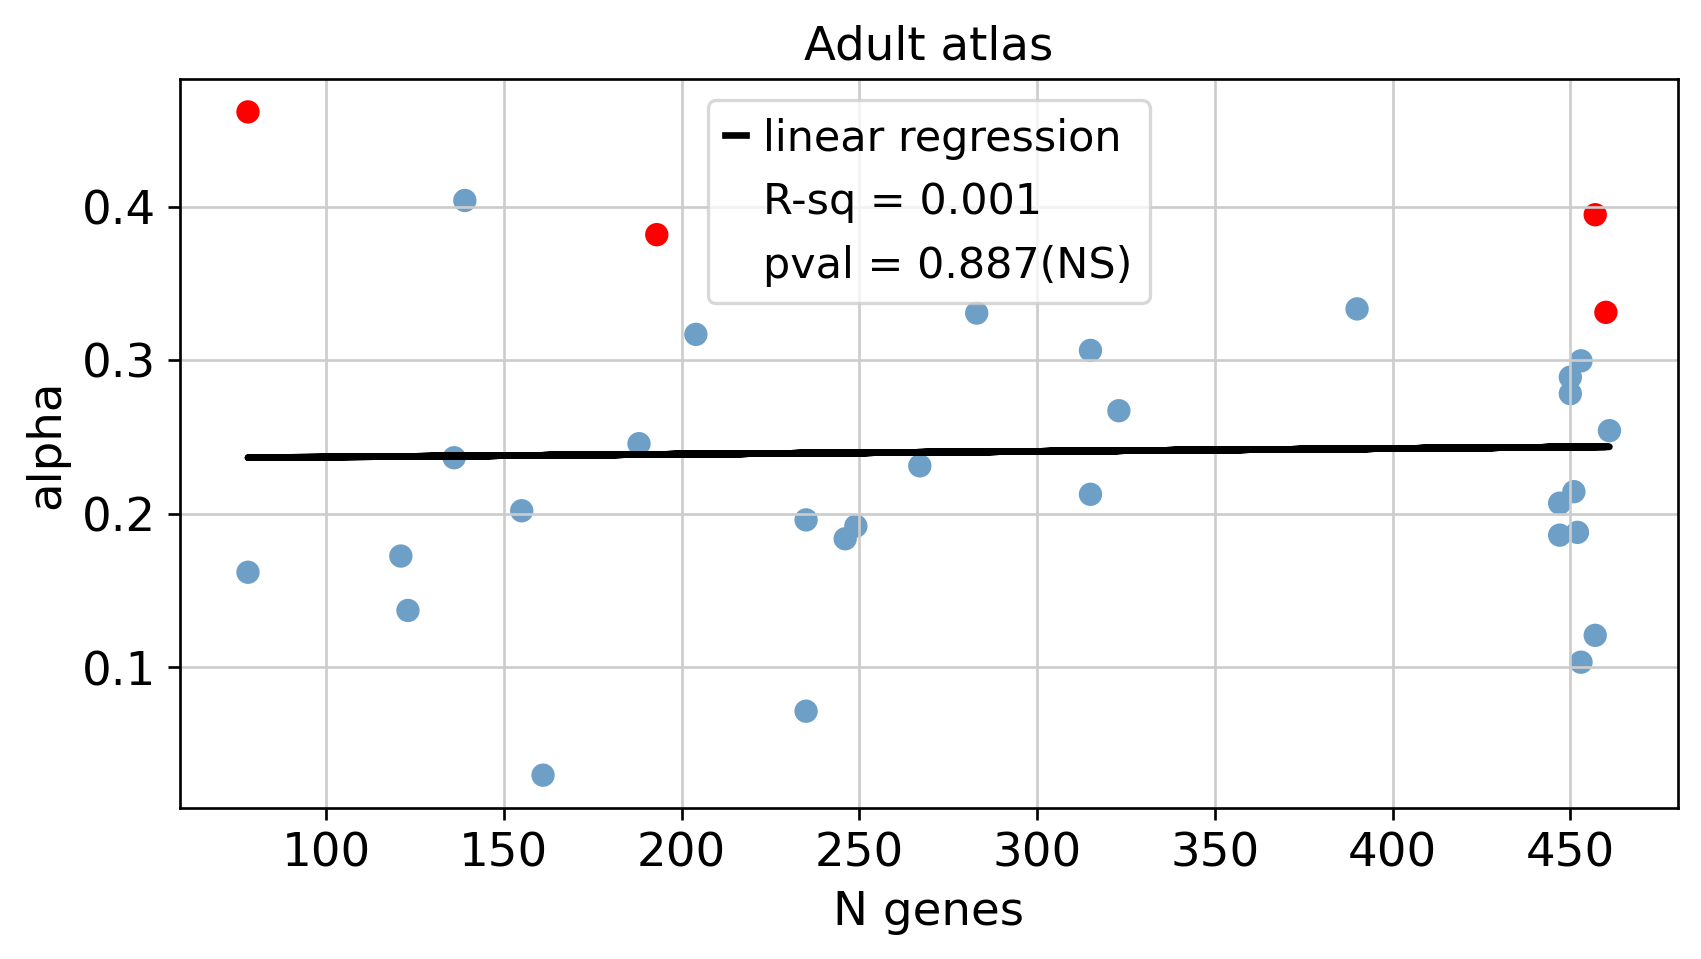

In [20]:
alpha_pval = np.where(alpha_vals["pvalue"] < 0.05, "red", "#6e9fc6")
figure(figsize=(8, 4), dpi=120)
plt.scatter(alpha_vals["n"], alpha_vals["α"] , color = alpha_pval)
plt.plot(x, mod1.fittedvalues, color='black', linewidth=2, label="linear regression")
# Create empty plot with blank marker containing the extra label
plt.plot([], [], ' ', label="R-sq = 0.001")
plt.plot([], [], ' ', label="pval = 0.887(NS)")
#plt.xscale('log')
plt.title("Adult atlas")
plt.xlabel("N genes")
plt.ylabel("alpha")
plt.legend(framealpha=0.75, frameon=True);
plt.show()

<AxesSubplot:title={'center':'adata'}>

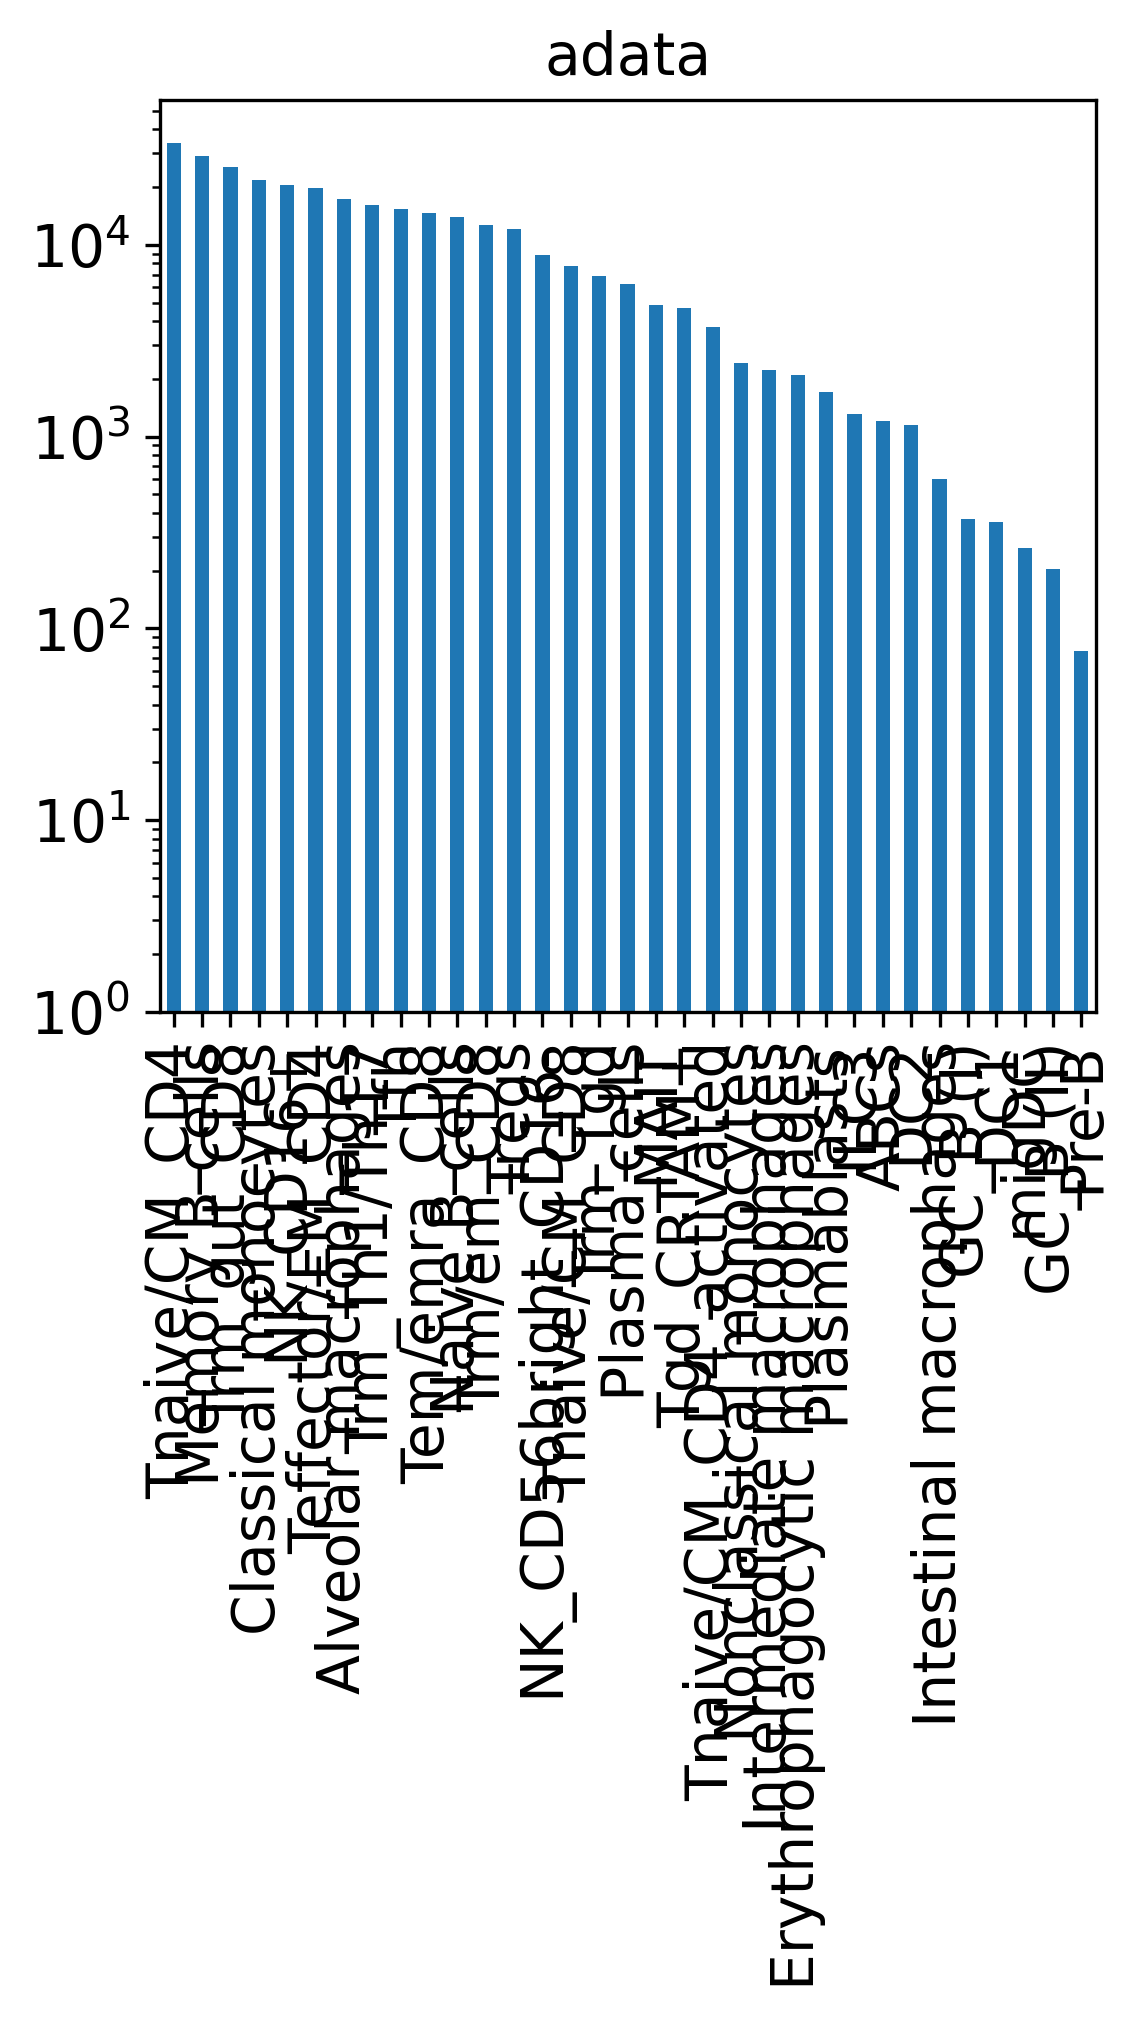

In [21]:
adata.obs['Manually_curated_celltype'].value_counts().plot(kind='bar', log="y",                                                        
                                                           grid=False, title='adata')


In [22]:
import re

df = adata.obs['Manually_curated_celltype'].value_counts()

d = {'celltypes': "celltypes", 'counts': df.values}
df2 = pd.DataFrame(data=d)


In [23]:
for i in range(len(df.index.values)) :
    x = re.sub(r'\/','_',str(df.index.values[i]))
    x =  re.sub(r' ','_',x)
    x =  re.sub(r'\(','',x)
    x =  re.sub(r'\)','',x)
    df2["celltypes"][i] = x
   # print(i)

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df2

celltypes  counts
0                   Tnaive_CM_CD4   33865
1                  Memory_B_cells   28915
2                     Trm_gut_CD8   25519
3             Classical_monocytes   21847
4                        NK_CD16+   20591
5                Teffector_EM_CD4   19869
6            Alveolar_macrophages   17238
7                    Trm_Th1_Th17   16099
8                             Tfh   15293
9                    Tem_emra_CD8   14612
10                  Naive_B_cells   13998
11                     Trm_em_CD8   12674
12                          Tregs   12143
13            NK_CD56bright_CD16-    8902
14                  Tnaive_CM_CD8    7801
15                        Trm_Tgd    6887
16                   Plasma_cells    6270
17                           MAIT    4849
18                     Tgd_CRTAM+    4690
19        Tnaive_CM_CD4_activated    3748
20         Nonclassical_monocytes    2420
21       Intermediate_macrophages    2236
22  Erythrophagocytic_macrophages    2103
23                   Plasmablasts    1710
24                           ILC3    1312
25                           ABCs    1209
26                            DC2    1147
27         Intestinal_macrophages     599
28                         GC_B_I     369
29                            DC1     356
30                          migDC     262
31                        GC_B_II     203
32                          Pre-B      75

In [25]:
df2["α"] = 0.0
df2["pvalue"] = 0.0
for i in range(len(df2["celltypes"])) :
    #print(df2["celltypes"][i])
    alpha = alpha_vals["α"][alpha_vals["cell"] == df2["celltypes"][i]]
    pval  = alpha_vals["pvalue"][alpha_vals["cell"] == df2["celltypes"][i]]
    #print(alpha)
    df2["α"][i] = alpha
    df2["pvalue"][i] = pval

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [26]:
alpha_vals

cell     line  type    α_weak  α_strong  \
0                            ABCs   Bcells  case  0.065437  0.096671   
1            Alveolar_macrophages  Myeloid  case  0.023407  0.063247   
2             Classical_monocytes  Myeloid  case  0.138008  0.146896   
3                             DC1  Myeloid  case  0.023154  0.333715   
4                             DC2  Myeloid  case  0.025469  0.192664   
5   Erythrophagocytic_macrophages  Myeloid  case  0.040510  0.083955   
6                          GC_B_I   Bcells  case  0.033860  0.191615   
7                         GC_B_II   Bcells  case  0.068146  0.176043   
8                            ILC3   Tcells  case  0.085016  0.083514   
9        Intermediate_macrophages  Myeloid  case  0.038294  0.082712   
10         Intestinal_macrophages  Myeloid  case  0.082302  0.136544   
11                           MAIT   Tcells  case  0.075060  0.099611   
12                 Memory_B_cells   Bcells  case  0.049334  0.146295   
13                       NK_CD16+   Tcells  case  0.054411  0.056018   
14            NK_CD56bright_CD16-   Tcells  case  0.155545  0.119298   
15                  Naive_B_cells   Bcells  case  0.045575  0.058393   
16         Nonclassical_monocytes  Myeloid  case  0.122937  0.115839   
17                   Plasma_cells   Bcells  case  0.067044  0.097392   
18                   Plasmablasts   Bcells  case  0.034293  0.079108   
19                          Pre-B   Bcells  case  0.054418  0.211829   
20               Teffector_EM_CD4   Tcells  case  0.049227  0.074504   
21                   Tem_emra_CD8   Tcells  case  0.047396  0.077955   
22                            Tfh   Tcells  case  0.054902  0.082968   
23                     Tgd_CRTAM+   Tcells  case  0.062774  0.071176   
24                  Tnaive_CM_CD4   Tcells  case  0.019658  0.031458   
25        Tnaive_CM_CD4_activated   Tcells  case  0.071645  0.113909   
26                  Tnaive_CM_CD8   Tcells  case  0.012977  0.010422   
27                          Tregs   Tcells  case  0.081047  0.098440   
28                        Trm_Tgd   Tcells  case  0.072969  0.121011   
29                   Trm_Th1_Th17   Tcells  case  0.131332  0.159650   
30                     Trm_em_CD8   Tcells  case  0.083880  0.217597   
31                    Trm_gut_CD8   Tcells  case  0.075135  0.118361   
32                          migDC  Myeloid  case  0.059729  0.204448   

           α   ωₐ_weak  ωₐ_strong        ωₐ       ωₙₐ           γ₋         β  \
0   0.212655  0.010399   0.022705  0.065950  0.221936   912.896882  0.181320   
1   0.103316  0.005166   0.015661  0.036348  0.271198  1310.643777  0.171883   
2   0.333371  0.027038   0.036975  0.095473  0.150930  1685.728397  0.232705   
3   0.394702  0.016717   0.091425  0.107371  0.172097  1043.210969  0.240741   
4   0.299548  0.009023   0.058660  0.080471  0.192932   990.985765  0.225059   
5   0.161877  0.009310   0.018874  0.040254  0.202008  1100.711771  0.222015   
6   0.278194  0.010820   0.040402  0.059089  0.164297   986.427592  0.247099   
7   0.306357  0.010189   0.044730  0.073256  0.181415   743.498803  0.243571   
8   0.206885  0.017160   0.021467  0.057483  0.244419   491.969574  0.176687   
9   0.183697  0.008401   0.017095  0.049650  0.239593   890.355287  0.197752   
10  0.254091  0.014459   0.031737  0.066831  0.206003  1156.137534  0.213212   
11  0.236445  0.023867   0.040945  0.095642  0.319292  1730.041651  0.156573   
12  0.316792  0.019354   0.054921  0.092592  0.271693   399.271385  0.186918   
13  0.120805  0.009439   0.013665  0.033133  0.269064  1502.982540  0.166863   
14  0.331146  0.038220   0.031654  0.097161  0.182034  1795.494818  0.213609   
15  0.137009  0.005159   0.010869  0.026348  0.186284  1677.305749  0.216392   
16  0.288939  0.020670   0.036828  0.071683  0.196822  1056.546901  0.208383   
17  0.187867  0.010670   0.017774  0.051163  0.223046   856.245340  0.196818   
18  0.186060  0.008076   0.021655  0.048964  0.241221   915.

In [27]:
df2

celltypes  counts         α    pvalue
0                   Tnaive_CM_CD4   33865  0.071411  0.871129
1                  Memory_B_cells   28915  0.316792  0.097902
2                     Trm_gut_CD8   25519  0.267074  0.155844
3             Classical_monocytes   21847  0.333371  0.071928
4                        NK_CD16+   20591  0.120805  0.707293
5                Teffector_EM_CD4   19869  0.201941  0.334665
6            Alveolar_macrophages   17238  0.103316  0.773227
7                    Trm_Th1_Th17   16099  0.381722  0.047952
8                             Tfh   15293  0.172441  0.389610
9                    Tem_emra_CD8   14612  0.195979  0.368631
10                  Naive_B_cells   13998  0.137009  0.489510
11                     Trm_em_CD8   12674  0.461663  0.026026
12                          Tregs   12143  0.245604  0.209790
13            NK_CD56bright_CD16-    8902  0.331146  0.024975
14                  Tnaive_CM_CD8    7801  0.029750  0.979021
15                        Trm_Tgd    6887  0.214363  0.275724
16                   Plasma_cells    6270  0.187867  0.362637
17                           MAIT    4849  0.236445  0.277722
18                     Tgd_CRTAM+    4690  0.191937  0.415584
19        Tnaive_CM_CD4_activated    3748  0.231180  0.289710
20         Nonclassical_monocytes    2420  0.288939  0.129870
21       Intermediate_macrophages    2236  0.183697  0.435564
22  Erythrophagocytic_macrophages    2103  0.161877  0.433166
23                   Plasmablasts    1710  0.186060  0.362637
24                           ILC3    1312  0.206885  0.394605
25                           ABCs    1209  0.212655  0.400599
26                            DC2    1147  0.299548  0.083916
27         Intestinal_macrophages     599  0.254091  0.166833
28                         GC_B_I     369  0.278194  0.154845
29                            DC1     356  0.394702  0.007992
30                          migDC     262  0.330660  0.089910
31                        GC_B_II     203  0.306357  0.130869
32                          Pre-B      75  0.403991  0.075924

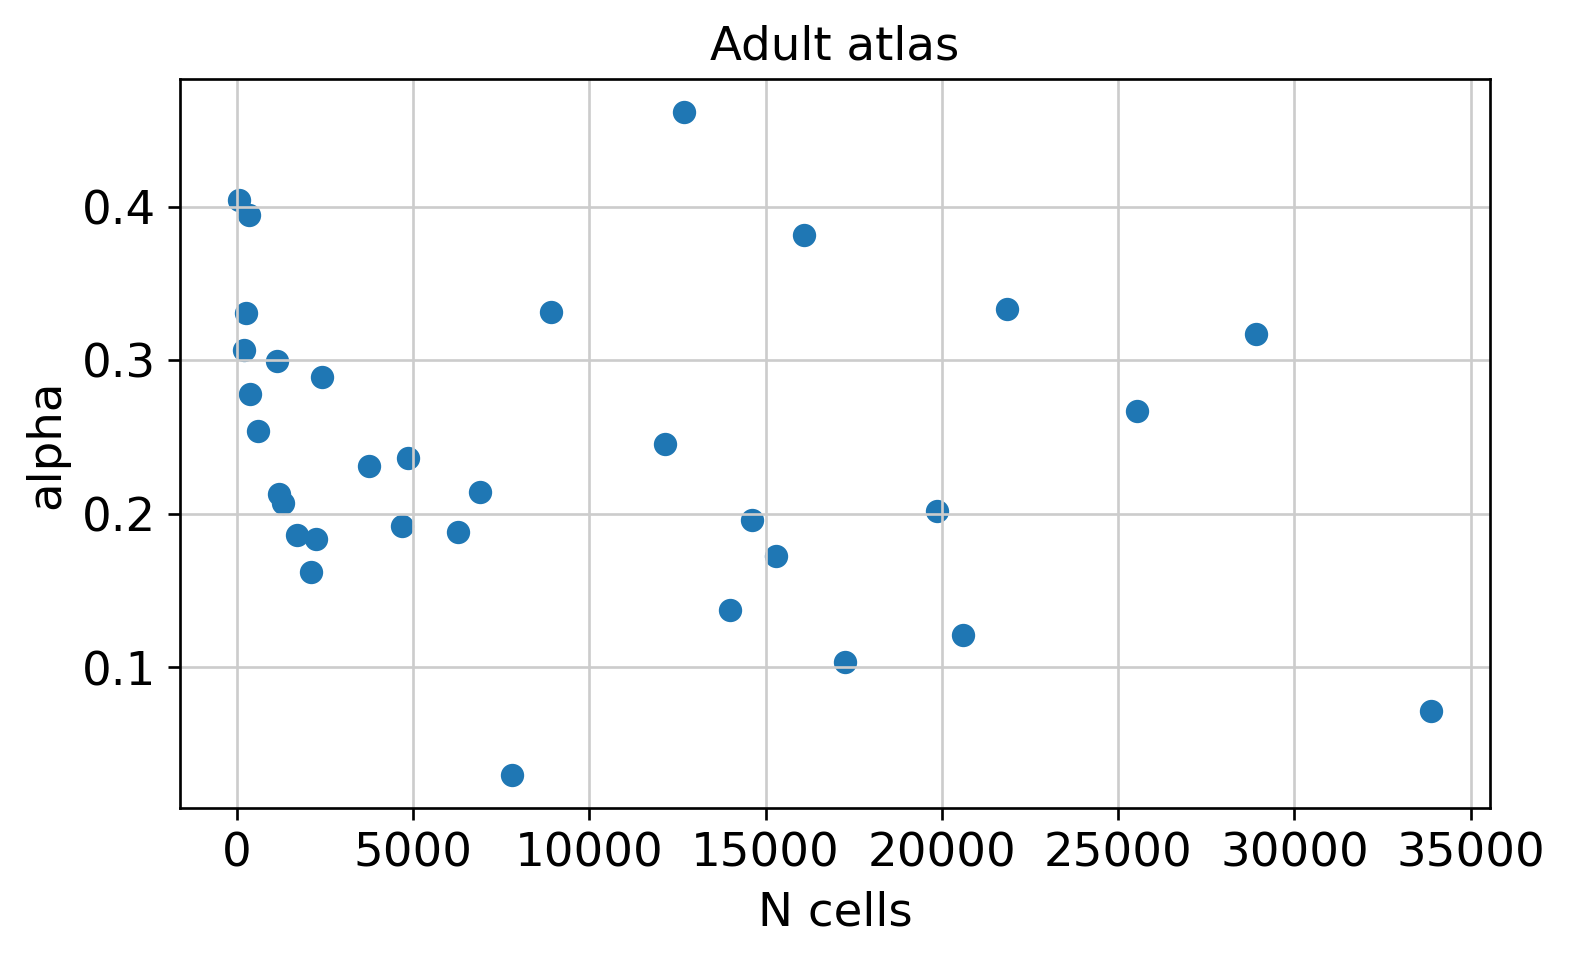

In [28]:
figure(figsize=(7, 4), dpi=120)
plt.scatter(df2["counts"], df2["α"] )
plt.title("Adult atlas")
plt.xlabel("N cells")
plt.ylabel("alpha")
plt.show()

In [29]:
x = df2["counts"].values
y = df2["α"].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [30]:
x2 = sm.add_constant(x)
mod1 = sm.OLS(y, x2).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.436
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.240
Time:                        14:30:09   Log-Likelihood:                 31.055
No. Observations:                  33   AIC:                            -58.11
Df Residuals:                      31   BIC:                            -55.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2612      0.024     10.824      0.0

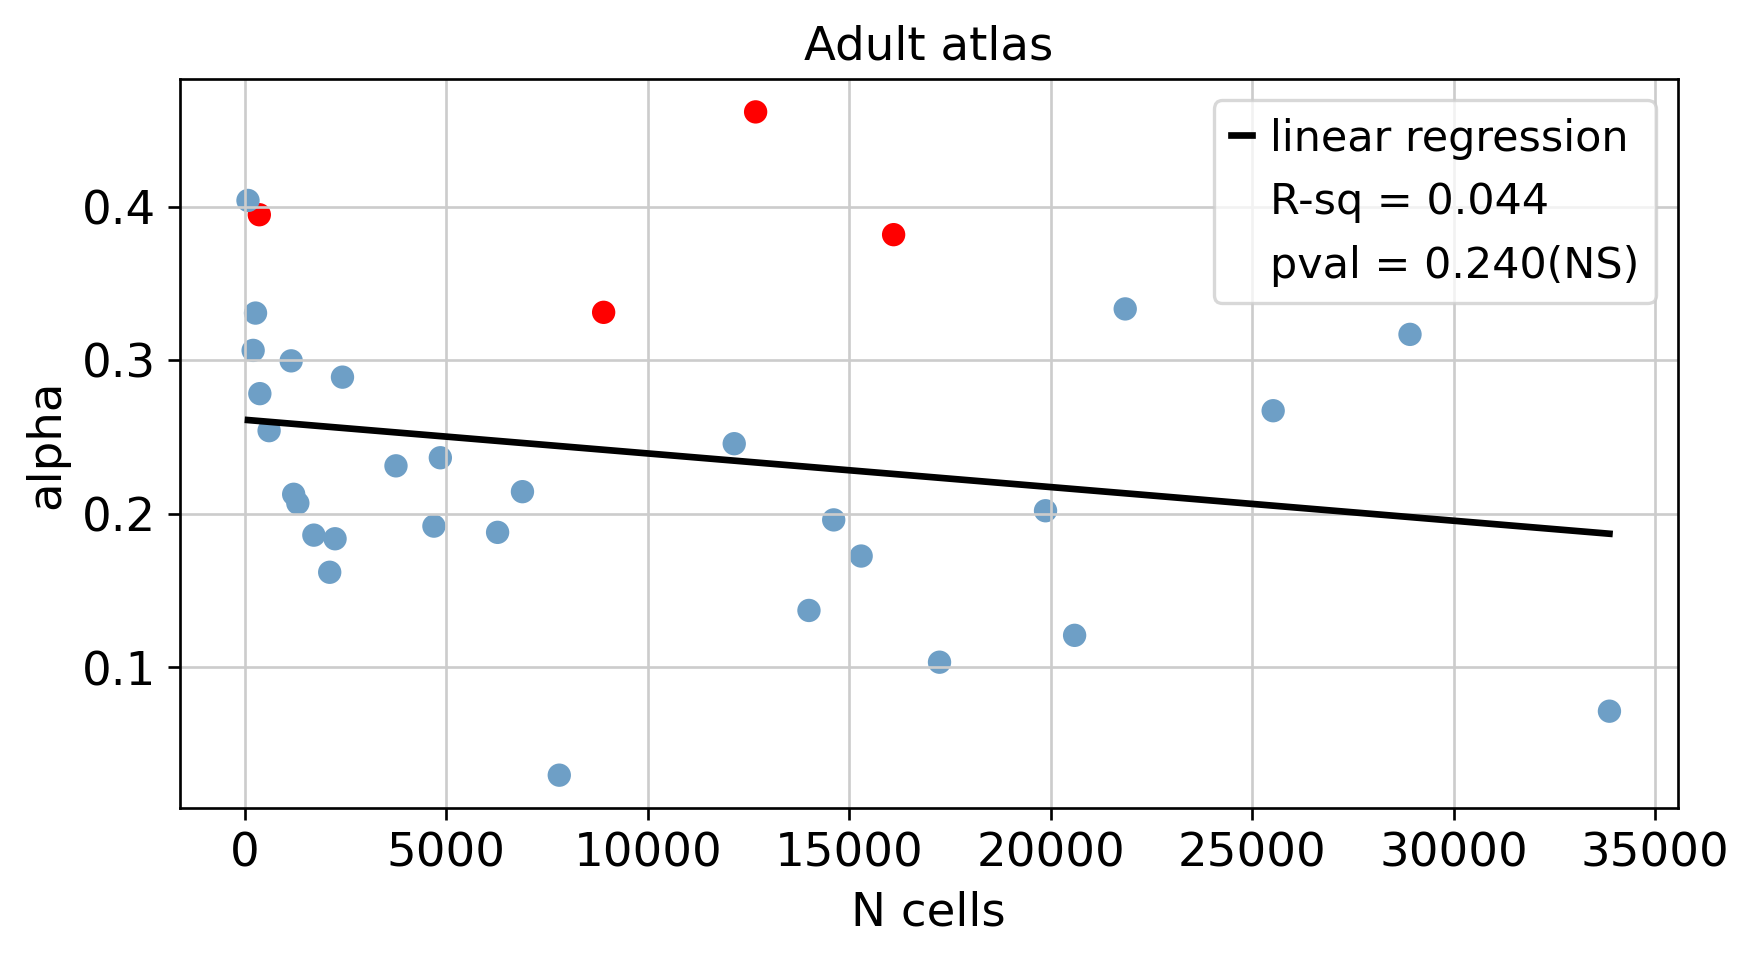

In [31]:
alpha_pval = np.where(df2["pvalue"] < 0.05, "red", "#6e9fc6")
figure(figsize=(8, 4), dpi=120)
plt.scatter(df2["counts"], df2["α"], color = alpha_pval)
plt.plot(x, mod1.fittedvalues, color='black', linewidth=2, label="linear regression")
# Create empty plot with blank marker containing the extra label
plt.plot([], [], ' ', label="R-sq = 0.044")
plt.plot([], [], ' ', label="pval = 0.240(NS)")
#plt.xscale('log')
plt.title("Adult atlas")
plt.xlabel("N cells")
plt.ylabel("alpha")
plt.legend(framealpha=0.75, frameon=True);
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


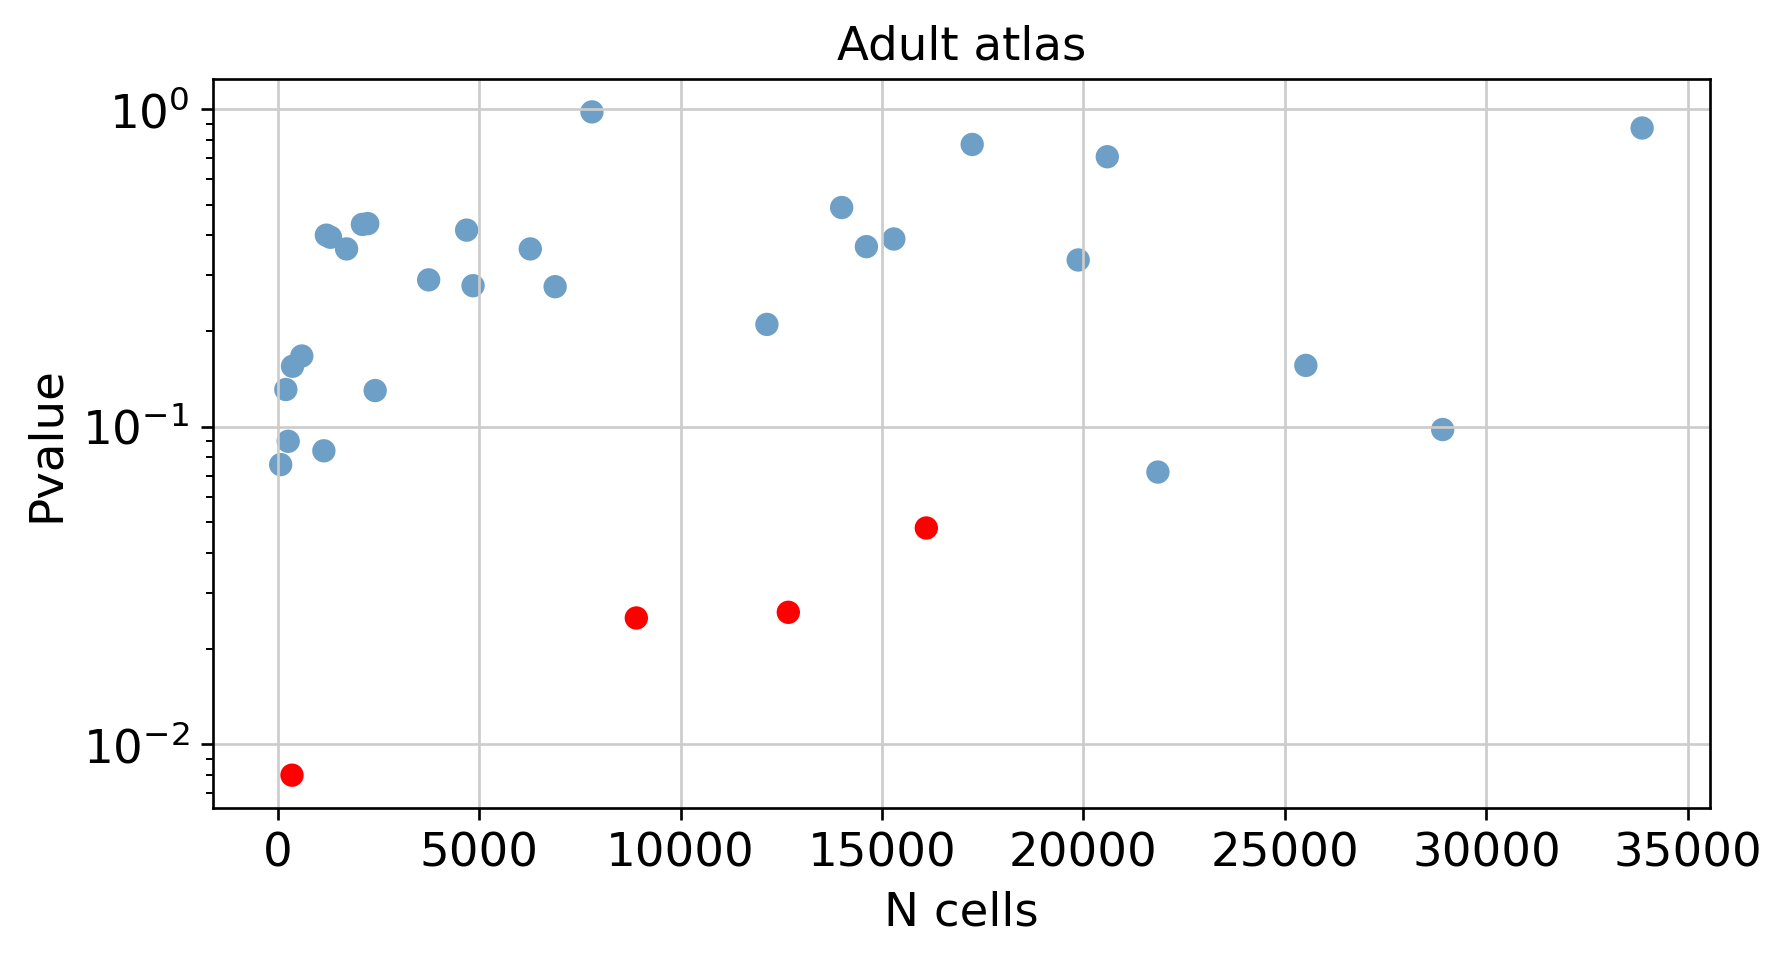

In [36]:
figure(figsize=(8, 4), dpi=120)
plt.scatter(df2["counts"], df2["pvalue"], color = alpha_pval)
#plt.plot(x, mod1.fittedvalues, color='black', linewidth=2, label="linear regression")
# Create empty plot with blank marker containing the extra label
#plt.plot([], [], ' ', label="R-sq = 0.001")
#plt.plot([], [], ' ', label="pval = 0.763(NS)")
plt.yscale('log')
plt.title("Adult atlas")
plt.xlabel("N cells")
plt.ylabel("Pvalue")
plt.legend(framealpha=1, frameon=False);
plt.show()